<a href="https://colab.research.google.com/github/jaekyoungkim/DLMLwithTorch/blob/main/pytorch%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%2C_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%B2%A0%EC%A0%80%EC%9E%85%EB%AC%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1부 우리 일상속의 AI

In [ ]:
# 라이브러리 설치
#conda install pytorch torchvision -c pytorch
#conda install jupyter
#conda install pillow
#conda matplotliv
#conda install pandas
#conda install scikit-learn
#pip install konlpy

# 2부 머신러닝 입문 

In [58]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset


In [39]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [205]:
import pandas as pd

In [206]:
wine=load_wine()
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [207]:
pd.DataFrame(wine.data, columns=wine.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [208]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [209]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [210]:
wine_data = wine.data[0:130]
wine_target = wine.target[0:130]
np.random.seed(100)
train_x, test_x, train_y, test_y = train_test_split(wine_data, wine_target, test_size = 0.2)
print(len(train_x))
print(len(test_x))
print(train_x)
print(train_y)


104
26
[[1.339e+01 1.770e+00 2.620e+00 ... 9.200e-01 3.220e+00 1.195e+03]
 [1.229e+01 1.410e+00 1.980e+00 ... 1.230e+00 2.740e+00 4.280e+02]
 [1.196e+01 1.090e+00 2.300e+00 ... 9.900e-01 3.130e+00 8.860e+02]
 ...
 [1.237e+01 1.170e+00 1.920e+00 ... 1.120e+00 3.480e+00 5.100e+02]
 [1.350e+01 1.810e+00 2.610e+00 ... 1.120e+00 3.820e+00 8.450e+02]
 [1.483e+01 1.640e+00 2.170e+00 ... 1.080e+00 2.850e+00 1.045e+03]]
[0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1
 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0
 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0]


In [211]:
len(wine.target)

178

In [212]:
train_x, test_x, train_y, test_y = train_test_split(wine_data, wine_target, test_size = 0.2)

In [213]:
len(train_x)

104

In [214]:
len(test_x)

26

In [215]:
train_x = torch.from_numpy(train_x).float()

In [216]:
train_y = torch.from_numpy(train_y).long()

In [217]:
test_x = torch.from_numpy(test_x).float()

In [218]:
test_y = torch.from_numpy(test_y).long()

In [219]:
print(train_x.shape)

torch.Size([104, 13])


In [220]:
print(train_y.shape)

torch.Size([104])


In [221]:
#torch.from_numpy(ndarray) : numpy배열을 tensor로 변환

In [222]:
train = TensorDataset(train_x, train_y)
print(train[0])

(tensor([1.3580e+01, 1.6600e+00, 2.3600e+00, 1.9100e+01, 1.0600e+02, 2.8600e+00,
        3.1900e+00, 2.2000e-01, 1.9500e+00, 6.9000e+00, 1.0900e+00, 2.8800e+00,
        1.5150e+03]), tensor(0))


In [223]:
# 미니 배치로 분할
train_loader = DataLoader(train, batch_size=16, shuffle=True)

In [224]:
train_loader

In [225]:
# torch.utils.data.Dataloader(dataset, batch_size =1, shuffle=False)

In [226]:
class Net(nn.Module):
  def __init__(self) :
    super(Net, self).__init__()
    self.fc1 = nn.Linear(13,96)
    self.fc2 = nn.Linear(96,2)
  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.log_softmax(x)
# 인스턴스 생성
model = Net()

In [227]:
model

Net(
  (fc1): Linear(in_features=13, out_features=96, bias=True)
  (fc2): Linear(in_features=96, out_features=2, bias=True)
)

In [59]:
 # 모형학습
criterion = nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(), lr=0.01)

In [229]:
criterion

CrossEntropyLoss()

In [230]:
for epoch in range(300):
  total_loss= 0 
  for train_x, train_y in train_loader:
    train_x , train_y = Variable(train_x), Variable(train_y)
    optimizer.zero_grad()
    output = model(train_x)
    loss=criterion(output, train_y) # 
    loss.backward()
    optimizer.step()
    total_loss += loss.data   # 책에 나온 내용 수정함  total_loss += loss.data[0]
  if (epoch+1) % 50 ==0:
    print(epoch+1, total_loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


50 tensor(4.8481)
100 tensor(4.8495)
150 tensor(4.8471)
200 tensor(4.8553)
250 tensor(4.8492)
300 tensor(4.8512)


In [ ]:
test_x, test_y = Variable(test_X), Variable(test_Y)
test_y

tensor([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 1])

In [ ]:
result = torch.max(model(test_x).data, 1)[1]
result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1])

In [ ]:
test_x, test_y = Variable(test_x), Variable(test_y)

result = torch.max(model(test_x).data,1)[1]
result

tensor([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0])

In [ ]:
test_y

tensor([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 1])

In [ ]:
accuracy = sum(test_y.data.numpy() == result.numpy()) / len(test_y.data.numpy())
accuracy

0.6923076923076923

# 3부 딥러닝 

In [231]:

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # 입력층
        self.fc1 = nn.Linear(13,96)
        #중간층
        self.fc2 = nn.Linear(96,96)
        self.fc3 = nn.Linear(96,96)
        self.fc4 = nn.Linear(96,96)
        self.fc5 = nn.Linear(96,96)
        #출력층
        self.fc6 = nn.Linear(96,2)
        
    def forward(self,x):
        #입력층~ 중간층(4층): 활성화 함순 relu 함수 사용
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        # 출력층
        x = self.fc6(x)
        #출력층 활성화 함수는 로그소프트맥스 함수 사용
        return F.log_softmax(x, dim = 1)
    
# 인스턴스 생성
model= Net()    

In [232]:
model

Net(
  (fc1): Linear(in_features=13, out_features=96, bias=True)
  (fc2): Linear(in_features=96, out_features=96, bias=True)
  (fc3): Linear(in_features=96, out_features=96, bias=True)
  (fc4): Linear(in_features=96, out_features=96, bias=True)
  (fc5): Linear(in_features=96, out_features=96, bias=True)
  (fc6): Linear(in_features=96, out_features=2, bias=True)
)

In [233]:
# 오차함수 객체
criterion = nn.CrossEntropyLoss()

# 최적화를 담당할 객체
optimizer = optim.SGD(model.parameters(),lr =0.01)

In [234]:
for epoch in range(300):
  total_loss= 0 
  for train_x, train_y in train_loader:
    train_x , train_y = Variable(train_x), Variable(train_y)
    optimizer.zero_grad()
    output = model(train_x)
    loss=criterion(output, train_y) 
    loss.backward()
    optimizer.step()
    total_loss += loss.data   # 책에 나온 내용 수정함  total_loss += loss.data[0]
  if (epoch+1) % 50 == 0:
      print(epoch+1,total_loss)

50 tensor(2.4709)
100 tensor(1.6504)
150 tensor(1.4209)
200 tensor(1.5973)
250 tensor(1.5413)
300 tensor(1.4600)


In [235]:
#계산 그래프 구성
test_x, test_y = Variable(test_x), Variable(test_y)

# 출력이 0 또는 1이 되게함
result = torch.max(model(test_x).data, dim = 1)[1]

#모형의 정확도 측정
accuracy = sum(test_y.data.numpy() == result.numpy()) / len(test_y.data.numpy())
accuracy

0.9230769230769231

In [236]:
################### # 손글씨 이미지 분류################
# sample_data 폴더 위치에 data 폴더를 하나 만든다. 

In [237]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_digits
from sklearn import datasets, model_selection
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm



In [383]:
# 교재에 나와있는 fetch_mldata는 더이상 사용 불가

from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', version=1, cache=True) 
mnist


{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [384]:
# mnist 컬럼구성 : col_names, descr, data, target

In [386]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [387]:
mnist_label = mnist.target
mnist_label = mnist_label.astype(int)
print(mnist_label.shape)
mnist_label

(70000,)


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

In [388]:
# 정규화 변수에 대입하고 화면에 출력
mnist_data = mnist.data / 255

In [423]:
pd.DataFrame(mnist_data)  # 70000개의 이미지에 대해서 784개 픽셀에 대한 정보를 보여줌

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.576471,0.988235,0.164706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [424]:
# torch.utils.data.TensorDataset(data_tensor, target_tensor) # tensor형태로 들어가야함
# torch.utils.data.DataLoader(data_tensor, target_tensor) # tensor형태로 들어가야함

In [417]:
#e데이터 집합을 훈련 데이터와 테스트 데이터로 분할
train_size = 5000
test_size = 500

train_x, test_x, train_y, test_y = model_selection.train_test_split(mnist_data, mnist_label, train_size = train_size, test_size=test_size)

print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(5000, 784) (5000,)
(500, 784) (500,)


In [418]:
train_x = torch.from_numpy(train_x.values).float()
train_y = torch.from_numpy(train_y.values).long()

# 테스트데이터 텐서 변환
test_x = torch.from_numpy(test_x.values).float()
test_y = torch.from_numpy(test_y.values).long()

# 변환된 텐서의 데이터 건수 확인
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

torch.Size([5000, 784]) torch.Size([5000])
torch.Size([500, 784]) torch.Size([500])


In [419]:
# 설명변수와 목적변수 텐서를 합침
train = TensorDataset(train_x,train_y)

# 텐서의 첫 번째 데이터를 확인
print(train[0])

# 미니배치 분할
train_loader = DataLoader(train, batch_size= 100, shuffle= True)

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000,

In [420]:
class Net(nn.Module):  # torch.nn.Module : 모든 신경망 모듈의 기본이 되는 클래스
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(784,256) # nn.Linear(in_features, out_features, bias=True)
    self.fc2 = nn.Linear(256,256)
    self.fc3 = nn.Linear(256,256)
    self.fc4 = nn.Linear(256,128)
    self.fc5 = nn.Linear(128,128)
    self.fc6 = nn.Linear(128,10)
  
  def forward(self,x):
    x=F.relu(self.fc1(x)) # nn.functional.relu(input)
    x=F.relu(self.fc2(x))
    x=F.relu(self.fc3(x))
    x=F.relu(self.fc4(x))
    x=F.relu(self.fc5(x))
    x=F.dropout(x, training = self.training)  # torch.nn.functional.dropout(input, p=0.5) drop out 확률 p 기본값은 0.5
    x=self.fc6(x)
    return F.log_softmax(x) # torch.nn.functional.log_softmax(input)


#import torch.nn as nn
#import torch.nn.functional as F
#import torch.optim as optim


model = Net()

In [421]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr= 0.01)
# sgd : 확률적 경사하강법으로 가중치를 최적화

In [425]:
# 학습 시작
# for 문으로 iteration을 진행함

for epoch in range(1000) :
  total_loss = 0 
  for train_x, train_y in train_loader:
    train_x, train_y = Variable(train_x), Variable(train_y)  # 계산 그래프 구성 torch.autograd.Variable(data) : 텐서를래핑하고, 계산과정을 기록하는 역할
    optimizer.zero_grad() # 경사도 초기화
    output = model(train_x) # 순전파 계산  , Predicted y
    loss =  criterion(output, train_y) # CEL를 활용해서 실제값과 Predicted y값을 활용해서 계산함
    # prediction, target의 shape을 확인 후 1D tensor로 맞추어 실행하셔야 될 것 같습니다.
    loss.backward() # 역전파 계산 / torch.autograd.backward(variables) : 경사의 합을 구함
    optimizer.step() # SGD를 활용해서 가중치 업데이트
    total_loss += loss.data # loss 업데이트
  if (epoch+1) % 100 == 0 :
    print(epoch+1, total_loss)  # 100번 반복할때마다 total_loss값 출력

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


100 tensor(29.8104)
200 tensor(3.2115)
300 tensor(0.3945)
400 tensor(0.2072)
500 tensor(0.1682)
600 tensor(0.0850)
700 tensor(0.0673)
800 tensor(0.0508)
900 tensor(0.0371)
1000 tensor(0.0344)


In [427]:
# 계산 그래프 구성
test_x, test_y = Variable(test_x), Variable(test_y)
# 출력이 0 또는 1이 되게함
result = torch.max(model(test_x).data, 1)[1]  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [431]:
result[:10]

tensor([9, 9, 5, 2, 6, 1, 7, 0, 2, 6])

In [432]:
test_y[:10]

tensor([1, 9, 5, 2, 0, 1, 7, 0, 2, 6])

In [434]:
test_y.data.numpy() # tensor -> numpy

array([1, 9, 5, 2, 0, 1, 7, 0, 2, 6, 4, 9, 5, 7, 9, 9, 1, 3, 1, 9, 1, 1,
       9, 1, 9, 1, 2, 9, 0, 5, 3, 6, 4, 5, 2, 8, 5, 0, 8, 9, 9, 1, 7, 2,
       2, 8, 9, 1, 4, 2, 8, 3, 4, 8, 8, 2, 9, 8, 3, 9, 7, 0, 1, 9, 9, 7,
       3, 1, 2, 3, 1, 2, 4, 4, 2, 2, 9, 7, 7, 8, 9, 3, 6, 5, 5, 5, 7, 3,
       3, 8, 2, 6, 1, 7, 1, 2, 8, 1, 4, 6, 4, 0, 1, 7, 9, 2, 0, 4, 9, 1,
       6, 8, 1, 8, 1, 8, 9, 8, 9, 5, 5, 1, 2, 5, 9, 4, 2, 5, 0, 2, 5, 1,
       7, 2, 9, 2, 9, 2, 4, 7, 0, 9, 1, 6, 6, 7, 5, 0, 5, 1, 8, 0, 2, 9,
       8, 5, 8, 8, 2, 3, 0, 4, 8, 1, 5, 3, 5, 8, 0, 1, 1, 7, 8, 6, 4, 1,
       5, 1, 1, 8, 8, 0, 2, 4, 4, 2, 2, 2, 2, 7, 7, 1, 9, 9, 7, 9, 1, 4,
       9, 6, 8, 2, 8, 9, 9, 7, 5, 8, 5, 8, 5, 7, 4, 6, 6, 3, 5, 8, 3, 5,
       0, 9, 5, 1, 6, 5, 0, 5, 6, 5, 0, 5, 9, 0, 8, 0, 2, 3, 2, 7, 5, 2,
       9, 0, 4, 6, 0, 0, 6, 6, 4, 3, 3, 8, 8, 3, 4, 9, 8, 9, 8, 7, 0, 7,
       4, 2, 5, 7, 1, 7, 8, 7, 1, 4, 2, 4, 9, 6, 1, 0, 0, 7, 7, 1, 0, 8,
       7, 3, 2, 2, 2, 4, 9, 8, 6, 9, 8, 7, 6, 6, 7,

In [436]:
test_y.data.numpy() == result.numpy()  

array([False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,

In [439]:
sum(test_y.data.numpy() == result.numpy())

459

In [441]:
len(test_y.data.numpy())

500

In [438]:
# 정확도
accuracy = sum(test_y.data.numpy() == result.numpy()) / len(test_y.data.numpy())  # numpy로 바꿔서 계산이 되게함
accuracy  # 500개중에서 459개 맞춤

0.918

In [395]:
############## 뉴스 기사 분류 ##################

In [442]:
# 이미지가 아닌 자연어 문장을 데이터로 삼는다.

In [446]:
# 한국일보 뉴스 말뭉치를 사용 http://kristalinfo.dynu.net/TestCollections/ 
# 다운로드 받은후에 폴더 하나 만들기 data/hkib-20000

In [1]:
import os 
import re # 정규표현식

In [2]:
from sklearn import datasets, model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 3.7 MB/s 
     |████████████████████████████████| 448 kB 41.0 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [4]:
# 형태소 분석기
from konlpy.tag import Hannanum 
from konlpy.tag import Kkma 

In [6]:
# 데이터정리
dir_prefix = 'data/'
target_dir = 'hkib-20000'
cat_dirs = ['health','economy','science','education','culture','society','industry','leisure','politics']
cat_prefixes = ['건강','경제','과학','교육','문화','사회','산업','여가','정치']
files = os.listdir(dir_prefix+target_dir)  # 해당 디렉토리에 있는 파일 리스트를 뽑아내줌

In [7]:
files

['HKIB-20000_001.txt',
 'HKIB-20000_005.txt',
 'HKIB-20000_004.txt',
 'HKIB-20000_002.txt',
 'HKIB-20000_003.txt']

In [8]:
# 파일구성
## @DOCUMENT
#DocID : 12443
#CAT'03: /건강과 의학/의약학/한의학 전통의학
#CAT'07: /정치/정부부처/보건복지부
#TITLE : "KGMP 미실시업체 제조정지 유예 필요"
#TEXT  : 


In [9]:


# 5분할된 텍스트 파일을 각각 처리 001-005
for file in files:
    # 데이터가 담긴 파일만 처리
    if not file.endswith('.txt'):
        continue

    # 각 텍스트 파일을 처리
    with open('data/hkib-20000/' + file) as currfile:
        doc_cnt = 0
        docs = []
        curr_doc = None

        # 기사 단위로 분할하여 리스트를 생성
        for curr_line in currfile:
            if curr_line.startswith('@DOCUMENT'):
                if curr_doc is not None:
                    docs.append(curr_doc)
                curr_doc = curr_line
                doc_cnt = doc_cnt + 1
                continue
            curr_doc = curr_doc + curr_line

        # 각 기사를 대주제 별로 분류하여 기사별 파일로 정리
        for doc in docs:
            doc_lines = doc.split('\n')
            doc_no = doc_lines[1][9:]

            # 주제 추출
            doc_cat03 = ''
            for line in doc_lines[:10]:
                if line.startswith("#CAT'03:"):
                    doc_cat03 = line[10:]
                    break

            # 추출한 주제 별로 디렉토리 정리
            for cat_prefix in cat_prefixes:
                if doc_cat03.startswith(cat_prefix):
                    dir_index = cat_prefixes.index(cat_prefix)
                    break

            # 문서 정보를 제거하고 기사 본문만 남기기
            filtered_lines = []
            for line in doc_lines:
                if not (line.startswith('#') or line.startswith('@')):
                    filtered_lines.append(line)

            # 주제별 디렉토리에 기사를 파일로 쓰기
            filename = 'hkib-' + doc_no + '.txt'
            filepath = 'data/hkib-20000/' + cat_dirs[dir_index]

            if not os.path.exists(filepath):
                os.makedirs(filepath)
            f = open(filepath + '/' + filename, 'w')
            f.write('\n'.join(filtered_lines))
            f.close()

In [10]:
# 위 코드를 다 돌리면 카테고리별로 폴더가 만들어진것을 확인 가능
# 대상이 되는 주제 폴더 선택
dirs = ['education','health']

In [11]:
#각 폴더의 파일을 하나씩 읽어들임
for i ,d in enumerate(dirs):
  #파일목록 읽어오기
  files = os.listdir('data/hkib-20000/'+d)
  for file in files:
    
    f= open('data/hkib-20000/'+d+'/'+file, 'r', encoding='utf-8')
    raw = f.read()

    #정규표현식을 활용해 불필요한 문자열을 제거한 다음 파일 내용을 출력

    reg_raw = re.sub(r'[0-9a-zA-Z]','', raw)
    reg_raw = re.sub(r'[-\'@#:/<>!-"*\(\)]','', raw)
    reg_raw = re.sub(r'[ ]+',' ', reg_raw)
    reg_raw = reg_raw.replace('\n',' ')


In [12]:
reg_raw

'  새해 벽두부터 서울토박이에 관한 얘기가 장안의 화제로 떠오르고 있다. 3일은 서울시가 서울토박이에 대한 기준을 마련하고 해당 시민들로부터 신청을 받기시작한 첫 날 이었다.   이날 서울시내 동사무소와 구청및 본청에는 서울토박이임을 신청하려는 시민들과 이에 관한 문의전화가 홍수를 이뤘다.   서울토박이문제는 그동안 자격요건을 둘러싸고 논란도 많았다. 신청이 마감되는 갑술년 3월쯤에는 어쨌든 이 문제에 대한 매듭이 지어질것 같다.   그러나 서울토박이는 사람뿐만아니라 가게 음식점등의 유형재도 해당될 수 있다.   서울 공평동 화신백화점 뒷편에 위치한 이문설렁탕집은 전형적인 서울 토박이 음식점으로 꼽히고있어,관심을 모으고 있다.   이 설렁탕전문 음식점은 전통 한가지만으로도 서울토박이의 기준 요건을 충족시키고 있다.   서울시는 서울토박이의 기준을 선조가 1910년이전 한성부에 정착한 이후 지금까지 서울 행정구역내에서 계속 거주하고있는 시민으로 규정했다.   이 음식점은 생긴지 90년을 육박한다. 그러니까 1905년 내지 1906년쯤 탄생된 셈이다.   더욱이 설렁탕 자체가 몇 안되는 서울토박이 음식중의 하나이다.   설렁탕의 유래에 관해서는 여러가지 설이 있지만 서울토박이 음식인 것 만은 확실하다는게 학자들의 일치된 견해다.   재미있는 사실은 이 음식점을 드나드는 단골손님 가운데 서울토박이가 수 없이 많다는 점이다.   집주인인 유원석 할머니75는 이곳에서 설렁탕 장사를 처음 시작한 시기 를 50년대 후반쯤으로 기억한다.   당시 이름은 모르지만 양모씨라는 분으로부터 이 음식점을 인수했는데 주방장이 설렁탕을 잘 만들기로 유명한 90대 노인이었지요 유씨는 항상 모시적삼만 입고있던 이 노인으로부터 설렁탕을 만드는 기법을전수받았다고 한다. 이문이라는 이름은 옛날 이곳에 이문이라는 석문이 있었던데서 유래 했다는게 그녀의 설명이다.   이 할머니는 황해도 해주태생으로 39년에 이화전문을 나온 당시로서는 엘리트 여성이었다. 그녀는 학창시절 단짝이었던 이원숙씨지휘자 정

In [13]:
len(reg_raw)

2125

In [14]:
# 기사에 출현하는 단어와 레이블을 저장할 리스트를 생성
x_ls =[]
y_ls = []
tmp1 = []
tmp2 = ''
# 형태소 분석기 객체생성
tokenizer = Kkma()
# tokenizer = Hannanum()


In [15]:
# 기사에 출현하는 단어와 레이블을 저장할 리스트를 생성
x_ls =[]
y_ls = []
tmp1 = []
tmp2 = ''
# 형태소 분석기 객체생성
tokenizer = Kkma()
# tokenizer = Hannanum()


In [16]:
for i, d in enumerate(dirs):
  files = os.listdir('data/hkib-20000/'+d)

  for file in files:
    f= open('data/hkib-20000/'+d+'/'+file ,  'r', encoding ='utf-8')
    raw = f.read()

    reg_raw = re.sub(r'[-\'@#:/<>!-"*\(\)]', '',raw)
    reg_raw = re.sub(r'[ ]',' ', reg_raw)
    reg_raw = reg_raw.replace('\n', ' ') 


    tokens = tokenizer.nouns(reg_raw)

    for token in tokens:
      tmp1.append(token)

    tmp2 =' '.join(tmp1)
    x_ls.append(tmp2)
    tmp1=[]

    y_ls.append(i)
    f.close()



In [17]:
import pandas as pd
import numpy as np
pd.DataFrame(x_ls)

,0
0,고려대 신입생 대부분 2 2차 차 수학 수학능력시험 능력 시험 결과 후 본인 의사 ...
1,95 95년 년 개원 광주 광주과학기술원 과학 기술원 정보 정보통신학과등 통신 학과...
2,국내 국내최초 최초 인터넷 논문 서관 등장 199812011712 12 주 주아카데...
3,전국 15 15개 개 시 교육감 21 21일 일 대입 내신 내신성적 성적 반영 반영...
4,삼성 삼성건설 건설 2 2일 일 러시아 국방성 발주 옐냐 옐냐아파트 아파트 건설공사...
...,...
996,2 2년만 년 만 콜레라 환자 환자발생 발생 199910221445 10 국내 보건...
997,한의사 의사 치과 치과의사 등 의료인 자격시험 국립 국립보건원등 보건원 19 19일...
998,17 17일 일 경남 울산군 범서 범서면 면 영리 현대 현대2차아파트 2 차 아파트...
999,20 20일 일 우수 우수의약품 의약품 제조 품질 품질관리기준시설 관리 기준 시설 ...


In [18]:
print(x_ls[0])

고려대 신입생 대부분 2 2차 차 수학 수학능력시험 능력 시험 결과 후 본인 의사 취직 학과 지망 분석 올해 처음 실시 본고사 등 입시 입시제도 제도 변화 중 과외 경험 학생 지난해 10 이상 증가 61.4 나 학생생활연구소소장 생활 연구소 소장 안 안창일 창일 심리 심리학가 학가 금년 4 4천5백 천 5 백 60 60명 명 대상 대학 대학입시 관련 관련태도 태도 행동 장래 장래계획 계획 설문 설문조사 조사 실태 실태조사 27 27일 일 조사결과 40.1 차 수능 수능시험 원서 원서접수 접수 마감 마감당일 당일 사이 최종 최종결정 결정 반면 1 1차 발표 발표후 14 기대 파악 원서교부 교부 접수기간 기간 19.2 3.5 예년 마찬가지 막판 막판눈치 눈치 경쟁 선택 선택시기 시기 학년 44 고등 고등학교 학교 3 3학년 23.4 2학년때 때 답 단과 단과대학 법대 의대생 입학 이전 자연 자연자원대 자원 대 기간중 과외경험 유무 데 과외지도 지도 응답 10.4 가량 이 과외형태 형태 학원 학원수강 수강 45.3 개인 개인지도 41.2 그룹 그룹지도 12.5 결정시 영향력 행사 사람 72.4 부모 10.5 선생님 10.3 친구 1.8 순 대학선택 요인 용 성 다음 졸업생 사회 사회기여도 기여도 선 후배 관계 졸업 졸업후의 후의 사회진출 진출 염두 두고 대학진학 진학 목적 사회적 인정 30.0 직장 취업 23.3 졸업후 진로 진로문제 문제 중요 결정요인임 임 입증 자신 87.2 의 정도 사전 사전지식 지식 정보 당면 당면문제 학업 학업문제 17.7 17.6 인간 인간관계 10.2 학 학자금문제 자금 9.6 전공 전공문제 8.5 난해 대두 이 대학원 35.4 밖 사업 19.6 해외 해외유학 유학 13.0 학사 학사편입 편입 5.4 3.1 3.2


In [19]:
print(y_ls)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [20]:
x_array = np.array(x_ls)
y_array = np.array(y_ls)

In [21]:
cntvec= CountVectorizer()

In [22]:
x_cntvecs = cntvec.fit_transform(x_array)
x_cntarray = x_cntvecs.toarray()

In [23]:
pd.DataFrame(x_cntarray)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,38163,38164,38165,38166,38167,38168,38169,38170,38171,38172,38173,38174,38175,38176,38177,38178,38179,38180,38181,38182,38183,38184,38185,38186,38187,38188,38189,38190,38191,38192,38193,38194,38195,38196,38197,38198,38199,38200,38201,38202
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# 단어와 단어의 인덱스 표시
for k, v in sorted(cntvec.vocabulary_.items(), key=lambda x:x[1]):
  print(k,v)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
취피구 33203
취하 33204
취학 33205
취학률 33206
취학연령 33207
취학전 33208
취학직전 33209
취한 33210
취합 33211
취항 33212
취항국과 33213
취향 33214
측간 33215
측근 33216
측도 33217
측면 33218
측면도 33219
측은 33220
측이 33221
측정 33222
측정기 33223
측정기관 33224
측정기준량생선 33225
측정등 33226
측정법 33227
측정연세대 33228
측정장비 33229
측통 33230
치과 33231
치과기공 33232
치과기공사 33233
치과대학 33234
치과면허시험 33235
치과병원 33236
치과병의원 33237
치과보험 33238
치과분야 33239
치과시술 33240
치과영역 33241
치과용 33242
치과용의자등 33243
치과위생사 33244
치과은 33245
치과의 33246
치과의료단 33247
치과의사 33248
치과의사단체 33249
치과의사협의 33250
치과의사협회 33251
치과의사협회등 33252
치과의사회 33253
치과의원 33254
치과재료 33255
치과전문의 33256
치과전문의제도 33257
치과치료 33258
치과환자 33259
치기 33260
치대에 33261
치대중 33262
치됐 33263
치러졌 33264
치료 33265
치료결과 33266
치료과정 33267
치료기 33268
치료기구 33269
치료등에 33270
치료방법 33271
치료방사선과등 33272
치료법 33273
치료분야 33274
치료비 33275
치료사 33276
치료성과 33277
치료세포 33278
치료시간 33279
치료실 33280
치료약 33281
치료약품 33282
치료연구소장 33283
치료자 33284
치료장치 33285
치료전 33286
치료제 33287
치료중 33288
치료중단 33289
치료중심 33290
치료중심병원 33291
치료중이 33292


In [30]:
cntvec

CountVectorizer()

In [34]:
tfidf_vec = TfidfVectorizer(use_idf=True)
x_tfidf_vecs = tfidf_vec.fit_transform(x_array)



In [35]:
x_tfidf_array = x_tfidf_vecs.toarray()  # array로 바꾸기

In [42]:
pd.DataFrame(x_tfidf_array)
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(x_tfidf_array, y_array, test_size=0.2)


In [43]:
print(len(train_X))
print(len(train_Y))

800
800


In [44]:
# tensor 생성
import torch
from torch.autograd import variable
import torch.nn as nn
import torch.optim as optim 
from torch.utils.data import DataLoader, TensorDataset


In [45]:
train_X=torch.from_numpy(train_X).float()
train_Y=torch.from_numpy(train_Y).long()

In [46]:
test_X=torch.from_numpy(test_X).float()
test_Y=torch.from_numpy(test_Y).long()

In [47]:
print(train_X.shape)
print(train_Y.shape)# torch.from_numpy(ndarray)

torch.Size([800, 38203])
torch.Size([800])


In [48]:
# x+y 하나의 텐서로 합친다
train = TensorDataset(train_X, train_Y)
print(train[0])

train_loader = DataLoader(train, batch_size=100, shuffle =True) #  설명변수와 목적변수를 합쳐 인덱스를 붙이고 하나의 데이터 집합으로 만들기
# batch_size 기본값은1, shuffle : 각 에포크마다 데이터를 셔플링할지여부로 기본값을 False

(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(1))


In [51]:
class Net(nn.Module):  # torch.nn.Module : 모든 신경망 모듈의 기본이 되는 클래스, 각층과 함수, 구조를 정의
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(38203, 256)
    self.fc2 = nn.Linear(256, 256)
    self.fc3 = nn.Linear(256, 256)
    self.fc4 = nn.Linear(256, 128)
    self.fc5 = nn.Linear(128, 128)
    self.fc6 = nn.Linear(128, 2)

  def forward(self, x):
    x= F.relu(self.fc1(x))  # torch.nn.functional.relu(input)
    x= F.relu(self.fc2(x))
    x= F.relu(self.fc3(x))
    x= F.relu(self.fc4(x))
    x= F.relu(self.fc5(x))
    x=self.fc5(x)
    return F.log_softmax(x)  # torch.nn.functional.log_softmax(input)

model = Net()
#model.cuda()


In [60]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

In [62]:
for epoch in range(20):
  total_loss=0

  for train_x, train_y in train_loader:
    train_x, train_y = Variable(train_x), Variable(train_Y)
    optimizer.zero_grad()
    output = model(train_X)
    loss = criterion(output, train_Y)
    loss.backward()
    optimizer.step()
    total_loss += loss.data
  print(epoch+1, total_loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


1 tensor(23.8442)
2 tensor(7.2944)
3 tensor(4.3200)
4 tensor(3.6741)
5 tensor(2.8766)
6 tensor(2.2527)
7 tensor(1.8008)
8 tensor(1.2185)
9 tensor(0.2630)
10 tensor(0.0316)
11 tensor(0.0292)
12 tensor(0.0283)
13 tensor(0.0280)
14 tensor(0.0278)
15 tensor(0.0278)
16 tensor(0.0277)
17 tensor(0.0277)
18 tensor(0.0277)
19 tensor(0.0277)
20 tensor(0.0277)


In [63]:
test_x, test_y = Variable(test_X), Variable(test_Y)
result = torch.max(model(test_X).data,1)[1]
accuracy = sum(test_y.cpu().data.numpy() == result.cpu().numpy()) / len(test_y.cpu().data.numpy())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [64]:
accuracy

0.9303482587064676

In [65]:
########################## 시계열 데이터에서 이상탐지하기 ###########################

In [66]:
# 학습 데이터 : 11년 1/1 ~ 16년 12/31까지의 서울시의 일평균 기온 데이터
# https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70

In [68]:
import torch
from torch.autograd import Variable
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

In [71]:
dt = pd.read_csv('data/weather.csv', skiprows=[0,1,2,3,4,5], encoding='cp949')

In [72]:
dt

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2011-01-01,108,-6.8,-10.4,-2.9
1,2011-01-02,108,-5.4,-8.5,-1.2
2,2011-01-03,108,-4.5,-8.5,-0.3
3,2011-01-04,108,-3.9,-7.4,-1.7
4,2011-01-05,108,-4.0,-7.7,-1.8
...,...,...,...,...,...
2187,2016-12-27,108,-2.3,-6.3,1.3
2188,2016-12-28,108,-3.7,-8.4,2.6
2189,2016-12-29,108,-4.2,-7.2,-1.1
2190,2016-12-30,108,-3.9,-9.1,1.0


In [73]:
temp= dt['평균기온(℃)']

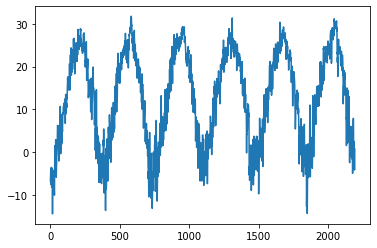

In [75]:
temp.plot()
plt.show()

In [167]:
train_x = temp[:1461]
test_x = temp[1461:]

In [168]:
train_x = np.array(train_x)
test_x = np.array(test_x)

In [169]:
train_x.shape

(1461,)

In [170]:
test_x.shape

(731,)

In [171]:
# 시계열 데이터에서의 훈련데이터를 어떻게 만들어야할지 고민
ATTR_SIZE = 180 #6개월


In [172]:
tmp = []
train_X =[]
for i in range(0, len(train_x) - ATTR_SIZE) : 
  tmp.append(train_x[i:i+ATTR_SIZE])
train_X = np.array(tmp)

In [173]:
train_X

array([[-6.8, -5.4, -4.5, ..., 19.2, 24.1, 21. ],
       [-5.4, -4.5, -3.9, ..., 24.1, 21. , 23.8],
       [-4.5, -3.9, -4. , ..., 21. , 23.8, 25.1],
       ...,
       [25.7, 22.6, 26.8, ..., -3.2, -1.8, -0.8],
       [22.6, 26.8, 25.7, ..., -1.8, -0.8,  2.9],
       [26.8, 25.7, 25.7, ..., -0.8,  2.9,  1.9]])

In [174]:
len(train_X)  # 1281

1281

In [175]:
pd.DataFrame(train_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179
0,-6.8,-5.4,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,-14.5,-9.7,-6.7,-6.6,-8.2,-6.8,-4.3,-4.5,-8.8,-8.4,-8.5,-8.9,-7.9,-9.1,-10.1,-6.2,-0.2,1.3,1.5,1.2,1.1,0.3,0.3,2.9,-1.2,...,14.5,17.3,19.5,21.5,22.7,20.7,20.1,22.4,24.4,22.7,18.7,18.0,19.0,19.0,18.7,20.4,20.9,20.9,22.0,19.4,21.4,24.0,23.4,21.0,22.8,25.2,26.5,24.9,24.5,26.6,26.6,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0
1,-5.4,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,-14.5,-9.7,-6.7,-6.6,-8.2,-6.8,-4.3,-4.5,-8.8,-8.4,-8.5,-8.9,-7.9,-9.1,-10.1,-6.2,-0.2,1.3,1.5,1.2,1.1,0.3,0.3,2.9,-1.2,-2.1,...,17.3,19.5,21.5,22.7,20.7,20.1,22.4,24.4,22.7,18.7,18.0,19.0,19.0,18.7,20.4,20.9,20.9,22.0,19.4,21.4,24.0,23.4,21.0,22.8,25.2,26.5,24.9,24.5,26.6,26.6,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8
2,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,-14.5,-9.7,-6.7,-6.6,-8.2,-6.8,-4.3,-4.5,-8.8,-8.4,-8.5,-8.9,-7.9,-9.1,-10.1,-6.2,-0.2,1.3,1.5,1.2,1.1,0.3,0.3,2.9,-1.2,-2.1,-2.9,...,19.5,21.5,22.7,20.7,20.1,22.4,24.4,22.7,18.7,18.0,19.0,19.0,18.7,20.4,20.9,20.9,22.0,19.4,21.4,24.0,23.4,21.0,22.8,25.2,26.5,24.9,24.5,26.6,26.6,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1
3,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,-14.5,-9.7,-6.7,-6.6,-8.2,-6.8,-4.3,-4.5,-8.8,-8.4,-8.5,-8.9,-7.9,-9.1,-10.1,-6.2,-0.2,1.3,1.5,1.2,1.1,0.3,0.3,2.9,-1.2,-2.1,-2.9,-5.9,...,21.5,22.7,20.7,20.1,22.4,24.4,22.7,18.7,18.0,19.0,19.0,18.7,20.4,20.9,20.9,22.0,19.4,21.4,24.0,23.4,21.0,22.8,25.2,26.5,24.9,24.5,26.6,26.6,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7
4,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,-12.2,-14.5,-9.7,-6.7,-6.6,-8.2,-6.8,-4.3,-4.5,-8.8,-8.4,-8.5,-8.9,-7.9,-9.1,-10.1,-6.2,-0.2,1.3,1.5,1.2,1.1,0.3,0.3,2.9,-1.2,-2.1,-2.9,-5.9,-4.8,...,22.7,20.7,20.1,22.4,24.4,22.7,18.7,18.0,19.0,19.0,18.7,20.4,20.9,20.9,22.0,19.4,21.4,24.0,23.4,21.0,22.8,25.2,26.5,24.9,24.5,26.6,26.6,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7,22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,25.3,26.0,25.7,22.6,26.8,25.7,25.7,27.1,25.9,27.6,28.9,27.1,25.3,25.4,26.4,26.8,26.6,25.9,26.1,27.0,27.9,27.3,25.9,23.6,21.9,27.5,22.6,25.0,26.6,26.5,28.6,28.6,30.2,31.4,26.5,26.4,26.6,24.4,24.7,26.1,...,6.2,5.0,5.6,7.9,11.3,11.0,9.0,9.8,10.2,11.0,10.4,8.8,8.3,9.1,-1.1,-5.4,-3.3,-4.6,-6.6,-5.6,-3.4,-1.6,-2.4,1.6,-1.5,-3.8,-5.2,-3.6,-0.1,-4.9,-9.0,-8.3,-3.8,-1.7,-6.4,-4.7,-1.3,1.7,-2.6,-3.2
1277,26.0,25.7,22.6,26.8,25.7,25.7,27.1,25.9,27.6,28.9,27.1,25.3,25.4,26.4,26.8,26.6,25.9,26.1,27.0,27.9,27.3,25.9,23.6,21.9,27.5,22.6,25.0,26.6,26.5,28.6,28.6,30.2,31.4,26.5,26.4,26.6,24.4,24.7,26.1,26.5,...,5.0,5.6,7.9,11.3,11.0,9.0,9.8,10.2,11.0,10.4,8.8,8.3,9.1,-1.1,-5.4,-3.3,-4.6,-6.6,-5.6,-3.4,-1.6,-2.4,1.6,-1.5,-3.8,-5.2,-3.6,-0.1,-4.9,-9.0,-8.3,-3.8,-1.7,-6.4,-4.7,-1.3,1.7,-2.6,-3.2,-1.8
1278,25.7,22.6,26.8,25.7,25.7,27.1,25.9,27.6,28.9,27.1,25.3,25.4,26.4,26.8,26.6,25.9,26.1,27.0,27.9,27.3,25.9,23.6,21.9,27.5,22.6,25.0,26.6,26.5,28.6,28.6,30.2,31.4,26.5,26.4,26.6,24.4,24.7,26.1,26.5,23.4,...,5.6,7.9,11.3,11.0,9.0,9.8,10.2,11.0,10.4,8.8,8.3,9.1,-1.1,-5.4,-3.3,-4.6,-6.6,-5.6,-3.4,-1.6,-2.4,1.6,-1.5,-3.8,-5.2,-3.6,-0.1,-4.9,-9.0,-8.3,-3.8,-1.7,-6.4,-4.7,-1.3,1.7,-2.6,-3.2,-1.8,-0.8
1279,22.6,26.8,25.7,25.7,27.1,25.9,27.6,28.9,27.1,25.3,25.4,26.4,26.8,26.6,25.9,26.1,27.0,27.9,27.3,25.9,23.6,21.9,27.5,22.6,25.0,26.6,26.5,28.6,28.6,30.2,31.4,26.5,26.4,26.6,24.4,24.7,26.1,

In [149]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.fc1 = nn.Linear(180, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 128)
    self.fc4 = nn.Linear(128, 180)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return x;

model = Net()

In [150]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [143]:
total_loss = 0 
d = []

In [151]:
for epoch in range(1000):
  total_loss = 0 
  d = []
  for i in range(100):
    index = np.random.randint(0,1281)  # 이사이의 하나의 값을 가져옴 
    d.append(train_X[index])  # 가져온 인덱스를 d 에 100개를 쌓음
  
  d = np.array(d, dtype = 'float32')  # d 를 
  d = Variable(torch.from_numpy(d))  # d :torch.Size([100, 180])

  optimizer.zero_grad()
  output = model(d)
  loss = criterion(output, d)
  loss.backward()
  optimizer.step()
  total_loss += loss.data
  if (epoch+1) % 100 ==0:
    print(epoch+1, total_loss)

100 tensor(8.8812)
200 tensor(8.5983)
300 tensor(7.5642)
400 tensor(7.5670)
500 tensor(7.1002)
600 tensor(6.5662)
700 tensor(6.1244)
800 tensor(6.0576)
900 tensor(5.2060)
1000 tensor(4.7241)


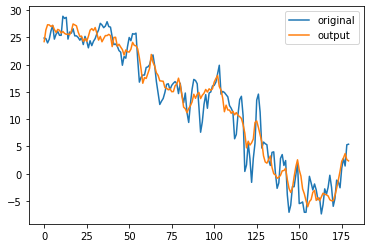

In [152]:
plt.plot(d.data[0].numpy(), label='original')
plt.plot(output.data[0].numpy(), label='output')
plt.legend(loc='upper right')
plt.show()

In [181]:
d.shape

torch.Size([551, 180])

In [182]:
tmp=[]
test_X=[]
tmp.append(test_x[0:180])
tmp.append(test_x[180:360])
tmp.append(test_x[360:540])
tmp.append(test_x[540:720])

test_X = np.array(tmp, dtype="float32")

In [183]:
test_X

array([[ -7.7,  -6. ,  -2.7,   2.5,   3.7,  -3.2,  -5.5,  -5.1,  -2.1,
         -0.3,  -0.4,  -2.7,   0.2,   2.5,   2.8,   0.8,  -4.1,  -1.3,
         -0.1,  -0.9,   2.6,   3.1,   1.2,   3.7,   3. ,   3.6,  -3.6,
         -4.1,  -1.1,  -3.3,  -4.5,  -3. ,  -0.6,   0.6,   0.4,  -0.1,
          0.4,   1.2,  -9.8,  -5.7,   1.7,   2.7,  -2.2,  -1.6,   2. ,
          7.9,   5. ,   1.9,   0.8,   2.2,   5.2,   5.7,   3.5,   0.9,
          2.1,   5.4,   1.2,  -1.3,   2.7,   2.4,   3.9,   2.8,  -2.1,
         -0.3,   2.9,   4.2,   7.7,   2.2,  -3.4,   0.4,   2.1,   5.6,
          4.3,   5.5,   9.8,  10.7,  10.7,  12.4,  13.4,  11.7,   8.3,
          4.6,   5.4,   6.5,   7.9,   9.1,   9.7,  10.5,  13.2,  12.9,
         12.9,  14.8,  10.6,  13.5,  10.5,  10.3,   8.4,   8.3,   9.6,
         11.6,  13.5,  14.9,  12. ,   6.9,  11.1,   9.9,  10.5,  15.2,
         14.5,  12.2,  14. ,  14.2,  14.5,  15.7,  15.9,  17.3,  18.5,
         20.3,  17. ,  21.2,  21. ,  20.7,  18.3,  16.1,  14.2,  15.4,
      

In [184]:
pd.DataFrame(test_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179
0,-7.7,-6.000000,-2.700000,2.500000,3.700000,-3.200000,-5.500000,-5.1,-2.1,-0.3,-0.400000,-2.7,0.200000,2.5,2.800000,0.800000,-4.100000,-1.3,-0.100000,-0.900000,2.6,3.100000,1.200000,3.700000,3.000000,3.6,-3.6,-4.100000,-1.100000,-3.300000,-4.5,-3.0,-0.600000,0.6,0.4,-0.100000,0.4,1.200000,-9.8,-5.700000,...,18.700001,20.0,20.600000,21.000000,20.799999,21.5,23.200001,24.299999,23.799999,19.799999,22.100000,21.700001,23.1,23.299999,24.200001,19.1,22.4,23.400000,22.400000,22.200001,25.299999,24.600000,23.600000,24.700001,22.799999,24.200001,25.0,23.4,24.799999,24.5,19.600000,22.4,24.0,24.700001,25.700001,24.799999,21.000000,25.200001,25.400000,25.700001
1,24.4,23.700001,23.700001,23.299999,24.100000,24.200001,25.299999,25.6,23.4,26.5,29.200001,30.4,24.799999,23.1,26.100000,27.900000,24.700001,23.6,24.299999,25.100000,27.5,27.000000,27.700001,26.900000,24.700001,25.0,26.0,26.200001,27.700001,26.700001,28.6,27.9,28.200001,26.5,27.9,27.500000,28.6,29.299999,28.9,26.600000,...,13.900000,10.4,8.900000,9.800000,9.200000,10.2,8.500000,5.600000,2.400000,-2.700000,-2.800000,0.100000,2.5,4.100000,4.000000,6.0,-0.7,-0.400000,3.400000,1.300000,1.900000,2.900000,5.000000,7.800000,6.400000,5.200000,5.2,5.0,4.700000,-1.0,-4.600000,-3.3,-0.1,1.500000,2.200000,3.100000,5.900000,1.500000,-0.800000,0.900000
2,-5.7,-5.700000,-3.200000,0.300000,0.700000,1.200000,5.700000,6.5,2.0,-2.7,-1.700000,-3.4,-3.300000,-2.1,0.300000,-3.800000,-5.200000,-4.5,-3.400000,-0.400000,-0.2,1.700000,-6.300000,-12.800000,-10.500000,-7.1,-7.6,-11.500000,-14.400000,-9.400000,-3.3,-1.1,-0.500000,1.9,0.6,-3.900000,-6.0,-5.300000,-2.4,-0.700000,...,17.400000,15.9,19.299999,22.299999,24.299999,24.0,24.100000,24.700001,23.299999,16.799999,19.700001,19.400000,20.9,21.700001,21.500000,22.1,21.6,23.299999,23.200001,22.200001,21.200001,24.700001,23.299999,21.700001,22.100000,24.100000,24.6,23.5,23.500000,23.5,23.799999,20.9,20.9,23.799999,24.500000,24.100000,24.700001,26.000000,24.299999,24.700001
3,23.1,22.799999,24.400000,24.400000,24.700001,25.299999,24.600000,24.0,23.5,23.5,21.799999,23.1,22.900000,24.0,27.299999,27.700001,27.900000,28.4,26.299999,26.299999,27.5,26.200001,20.799999,21.700001,24.400000,27.1,28.6,28.299999,29.100000,28.700001,28.0,28.4,28.400000,27.6,28.0,26.299999,28.6,28.900000,28.4,27.200001,...,9.100000,11.4,14.400000,13.200000,5.200000,5.2,9.100000,10.300000,13.000000,9.800000,9.500000,2.000000,-1.8,-2.500000,1.000000,0.9,3.3,1.400000,1.700000,6.000000,4.100000,1.600000,4.500000,5.500000,5.900000,-1.100000,1.7,2.1,1.400000,-1.6,-1.100000,2.3,3.4,-1.400000,-5.000000,-4.700000,2.700000,4.900000,7.200000,7.600000


In [185]:
d= Variable(torch.from_numpy(test_X))

In [186]:
output = model(d)

In [187]:
output

tensor([[-2.4038e+00, -2.3249e+00, -1.3973e+00, -1.1061e+00, -1.3526e+00,
         -1.2035e+00, -2.0379e+00, -2.9374e+00, -3.6788e+00, -3.3847e+00,
         -2.2318e+00, -3.2862e+00, -7.5437e-01, -1.0976e+00, -5.3069e-01,
         -1.8614e+00, -2.0308e+00, -1.0209e+00, -6.7800e-01,  6.1302e-01,
         -1.1632e+00,  4.6141e-01, -4.1506e-01, -2.5718e-01, -1.1275e+00,
         -1.6183e+00, -3.0623e+00, -1.9916e+00, -3.2556e+00, -2.9387e+00,
         -3.0819e+00, -2.6080e+00, -2.9759e+00, -1.9452e+00, -9.5100e-01,
         -5.0264e-01, -3.9676e-01, -1.9904e-01, -1.3715e+00, -9.2212e-01,
         -1.1972e+00, -2.0150e+00, -1.7874e+00, -1.4554e+00, -1.2617e+00,
         -7.8920e-01,  5.0684e-01,  1.8430e+00,  2.8459e+00,  2.9162e+00,
          2.7407e+00,  3.0384e+00,  1.3725e+00,  1.6975e+00,  7.8544e-01,
          1.6425e+00,  3.0600e+00,  2.8843e+00,  4.5918e+00,  5.0551e+00,
          3.9321e+00,  3.2661e+00,  3.4737e+00,  3.2400e+00,  2.5089e+00,
          3.2107e+00,  4.2260e+00,  4.

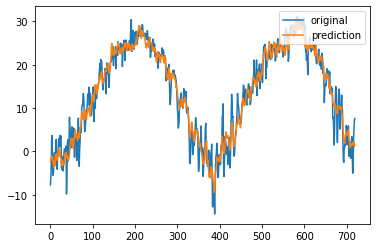

In [189]:
plt.plot(test_X.flatten(), label='original')
plt.plot(output.data.numpy().flatten(), label='prediction')
plt.legend(loc='upper right')
plt.show()

In [195]:
#이상점수 계산
test = test_X.flatten()
pred = output.data.numpy().flatten()
total_score =[]
for i in range(0,720):
  dist = (test[i] - pred[i])
  score = pow(dist,2)
  total_score.append(score)

total_score = np.array(total_score)
max_score = np.max(total_score)
total_score = total_score / max_score
total_score

array([3.22679973e-01, 1.55373070e-01, 1.95230049e-02, 1.49595884e-01,
       2.93680311e-01, 4.58539113e-02, 1.37890328e-01, 5.38038223e-02,
       2.86738133e-02, 1.09465353e-01, 3.86014233e-02, 3.95245276e-03,
       1.04780191e-02, 1.48892858e-01, 1.27618563e-01, 8.14850814e-02,
       4.92532003e-02, 8.95840233e-04, 3.84326115e-03, 2.63350013e-02,
       1.62911628e-01, 8.00919211e-02, 3.00070396e-02, 1.80142683e-01,
       1.95985574e-01, 3.13257908e-01, 3.32646637e-03, 5.11384585e-02,
       5.34531757e-02, 1.50201523e-03, 2.31343675e-02, 1.76743785e-03,
       6.49363431e-02, 7.45219272e-02, 2.09969500e-02, 1.86502834e-03,
       7.30292597e-03, 2.25167578e-02, 8.17236166e-01, 2.62612944e-01,
       9.65604181e-02, 2.55749479e-01, 1.95867788e-03, 2.40620244e-04,
       1.22387665e-01, 8.68569437e-01, 2.32245820e-01, 3.74275134e-05,
       4.81536427e-02, 5.90003387e-03, 6.95770657e-02, 8.14971262e-02,
       5.20691249e-02, 7.31576806e-03, 1.98794037e-02, 1.62422678e-01,
      

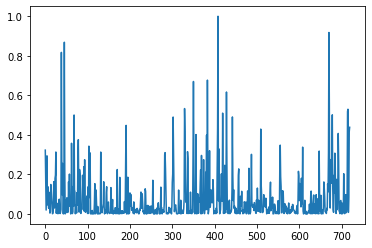

In [196]:
plt.plot(total_score)
plt.show()

In [1]:
#### 합성곱신경망 실전 활용 ####
# CNN을 활용하여 손글씨 이미지 분류



##### 참고

In [ ]:
############ 상속 / 오버라이팅 / super ##############
# https://rednooby.tistory.com/55 참고
# https://rednooby.tistory.com/56 참고 

In [ ]:
#오버라이드(Override)
#같은 이름을 가진 메소드를 덮어쓴다는 뜻입니다.

In [ ]:
class father(): #부모 클래스
    def handsome(self):
        print("잘생겼다")
 
class brother(father): #자식클래스(부모클래스) 아빠매소드를 상속받겠다
    '''아들'''
 
class sister(father): #자식클래스(부모클래스) 아빠매소드를 상속받겠다
    def pretty(self):
        print("예쁘다")
    def handsome(self):
        self.pretty()
 
brother = brother()
brother.handsome()
 
girl = sister()
girl.handsome()


잘생겼다
예쁘다


# 새 섹션